# Evaluación de clasificadores

Vamos a aprender una serie de métricas que se utilizan para medir la precisión de un clasificador, y las herramientas visuales y métodos de representación que suelen acompañarlas.

## Matriz de confusión


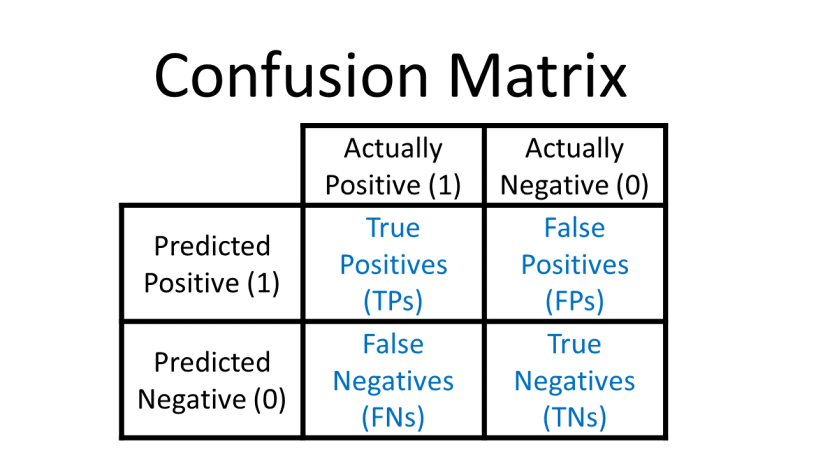

Sirve para mostrar de forma visual las frecuencias de los datos reales y los datos predichos. Aumenta de tamaño a medida que aumenta el número de clases que se pueden predecir.

Suponiendo un problema de clasificación binaria:

|                        | Real (clase 0) | Real (clase 1) |
| ---------------------- | -------------- | -------------- |
| **Predicho (clase 0)** | A              | B              | 
| **Predicho (clase 1)** | C              | D              |

Podemos obtener diferentes medidas de calidad.

$$
accuracy = \frac{A+D}{A+B+C+D}
$$

$$
precision_0 = \frac{A}{A+B}
$$

$$
precision_1 = \frac{D}{C+D}
$$

$$
recall_0 = \frac{A}{A+C}
$$

$$
recall_1 = \frac{D}{B+D}
$$

Donde
* **Accuracy**, también llamado valor de predicción positivo, mide la fracción de valores relevantes entre el total, es decir, la capacidad predictora del clasificador.
* **precision** y **recall** mide los datos relevantes obtenidos con éxito (recordemos que seguimos en aprendizaje supervisado). Se suelen unificar para obtener la medida F1:
$$
F1_c = \frac{precision_c \cdot recall_c}{precision_c + recall_c}
$$

Todas estas medidas de calidad se encuentran definidas dentro de [`sklearn.metrics`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics)

Veamos algunos ejemplos de estas medidas:
Empezamos cargando el dataset de vinos incluido en `sklearn`

In [11]:
from sklearn import datasets
import pandas as pd

wine = datasets.load_wine()

X = pd.DataFrame(data=wine.data, columns=wine['feature_names'])
y = pd.DataFrame(data=wine.target, columns=['target'])

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

Lo dividimos en entrenamiento y test, como siempre:

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Vamos a utilizar estos datos para entrenar un clasificador, por ejemplo, la regresión logística vista en sesiones anteriores:

In [13]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(random_state=42).fit(X_train, y_train)
predicciones = lg.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ahora representamos la matriz de confusión de las predicciones mediante [`plot_confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix):

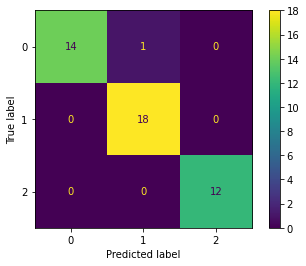

In [14]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, predicciones, labels=lg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lg.classes_)
disp.plot()
plt.show()

Finalmente, acompañamos con el informe:

In [15]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicciones, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      0.93      0.97        15
     class_1       0.95      1.00      0.97        18
     class_2       1.00      1.00      1.00        12

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## Curva ROC

El área bajo una curva ROC es una forma importante de medir el rendimiento de un clasificador **binario**.

Pero... ¿Son tan frecuentes los clasificadores binarios (sí/no)? Pues resulta que en medicina se utilizan con frecuencia para determinar si un paciente padece o no una enfermedad.

La curva ROC mide la relación entre verdaderos positivos y falsos positivos. Veamos un ejemplo con un dataset médico:

In [16]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Se dividen los datos en entrenamiento y test, como siempre:

In [17]:
from sklearn.model_selection import train_test_split

X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Entrenamos un modelo, como `LinearSVC`:

In [20]:
from sklearn.svm import LinearSVC

clf = LogisticRegression(random_state=42).fit(X_train, y_train)

y_pred = clf.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Y así, la curva resultante sería:

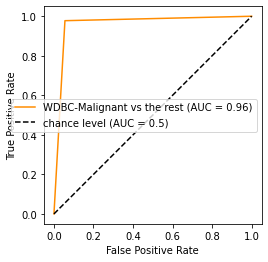

In [32]:
from sklearn.metrics import RocCurveDisplay


RocCurveDisplay.from_predictions(
    y_test,
    y_pred,
    name=f"{'WDBC-Malignant'} vs the rest",
    color="darkorange",
)

plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Fuentes:
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
* https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

Ejemplo inicial de la matriz de confusión binaria obtenido del material del profesor **Fernando Ortega** (fernando.ortega@upm.es)

<img src="https://licensebuttons.net/l/by-nc-sa/3.0/88x31.png">